### coding simple attention mechanism
#### 1.simple attention without trainable weights

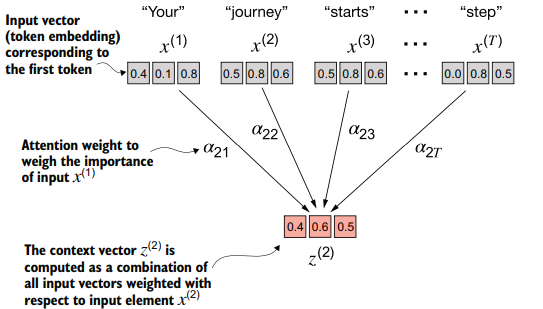

steps to do so-

- calculate attention score(w)- dot product of query token(x2) and input token (x1)
- normalize the attention score to get attention weights (alpha)- mainly prefer softmax(better at managing extreme values and offer favourable gradient properties) also maintain attention weights are always +
- calculate context vector (z)= multiply each input vector with attention weights(alpha)

In [ ]:
import torch

#very small embedding with 3 dim vectors
inputs= torch.tensor(
    [[0.42, 0.13, 0.81], #x1
    [0.55, 0.87, 0.66],  #x2   
    [0.22, 0.58, 0.33],  #x3   
    [0.54, 0.85, 0.64],  #x4
    [0.77, 0.25, 0.10],  #x5
    [0.05, 0.80, 0.55]]  #x6
)

In [ ]:
#step 1- computing unnormalized attention 

query = inputs[1] #second input token is query
attn_score2= torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_score2[i] = torch.dot(x_i, query) # dot product

print(attn_score2)

tensor([0.8787, 1.4950, 0.8434, 1.4589, 0.7070, 1.0865])


In [5]:
#step 2- normalize attention scores

#you can calcuate by other normalization technique , softamx is better at handling extreme values and desirable gradient properties during training

attn_weights2 = torch.softmax(attn_score2, dim=0)

print("attention weights:", attn_weights2)
print("sum:", attn_weights2.sum())

attention weights: tensor([0.1303, 0.2412, 0.1257, 0.2327, 0.1097, 0.1603])
sum: tensor(1.)


In [ ]:
#step 3-computing context vector (z^2)

query =inputs[1]

context_vec2 = torch.zeros(query.shape)
for x, x_i in enumerate(inputs):
    context_vec2 += attn_weights2[i] * x_i

print(context_vec2)

tensor([0.4089, 0.5580, 0.4955])
